#Caso Empresa E-Commerce

Una importante empresa de comercio electrónico con sede en la ciudad de Nueva York que vende ropa en línea, pero también tienen sesiones de asesoramiento sobre estilo y ropa física en la tienda, presenta el siguiente comportamiento de negocio:

Los clientes vienen a la tienda, tienen sesiones/reuniones con un estilista personal, luego pueden irse a casa y ordenar en una aplicación móvil o sitio web la ropa que desean.

La empresa está tratando de decidir si centrar sus esfuerzos en la experiencia de su aplicación móvil o en su sitio web. El objetivo del presente estudio es analizar los datos recolectados a una muestra de sus clientes para ayudarlos a tomar la mejor decisión.

##Importamos las librerías necesarias

Utilizaremos las librerias de pandas, numpy, sklearn, matplotlib y seaborn.

In [2]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9862ee1fd24453058888c65dc187536ff2499e4eb662e7351b1eb741fcb08e95
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from pandas_profiling import ProfileReport #Importa una función que nos automatizará el perfilamiento de los datos.
from sklearn.model_selection import train_test_split #Importa una función que nos permite separar los datos de entrenamiento y prueba para el modelo
from sklearn.linear_model import LinearRegression #Importa la función que nos permitirá realizar el modelamiento por medio de una regresion lineal simple
from sklearn import metrics #Importa metricas scikit-learn para el calculo del accuracy
from sklearn import preprocessing #Importa funciones para el procesamiento de los datos
from sklearn.metrics import r2_score

<ipython-input-3-3873258c6a3f>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


##Carga de los datos

Trabajaremos con el archivo csv de clientes de comercio electrónico de la empresa. Tiene información del cliente, como correo electrónico, dirección y su avatar de color. Luego también tiene columnas de valores numéricos:

* Avg. Session Length: Duración promedio de las sesiones de consejos de estilo en la tienda.
* Time on App: tiempo promedio dedicado a la aplicación en minutos
* Time on Website: tiempo promedio de permanencia en el sitio web en minutos
* Length of Membership: Cuantos años el cliente ha sido miembro.

** Leer en el archivo csv de clientes de comercio electrónico como un dataframe de datos llamado df_customers. **

Este es el link de los datos:
https://www.dropbox.com/s/wqzj1p235dtjyam/Ecommerce%20Customers.csv?dl=0

In [4]:
df_customers=pd.read_csv('https://www.dropbox.com/s/wqzj1p235dtjyam/Ecommerce%20Customers.csv?dl=1', sep=",")

Se imprimen las primeras línea del df para observar los datos:

In [5]:

df_customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<p>Visualizamos las estadística de todas las columnas:</p>

In [7]:
df_customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


##Análisis Exploratorio

Exploremos los datos!

Visualizamos el comportamiento de los datos utilizando la funcion ProfileReport, que nos ofrece un reporte general de cada una de las variables y su relacion entre si.


In [6]:
ProfileReport(df_customers)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Revisamos la correlación entre las variables del df

In [20]:
df_customers.corr()






<ipython-input-20-f2158c1d08c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_customers.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<ipython-input-22-37f72551c7a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_customers.corr())


<Axes: >

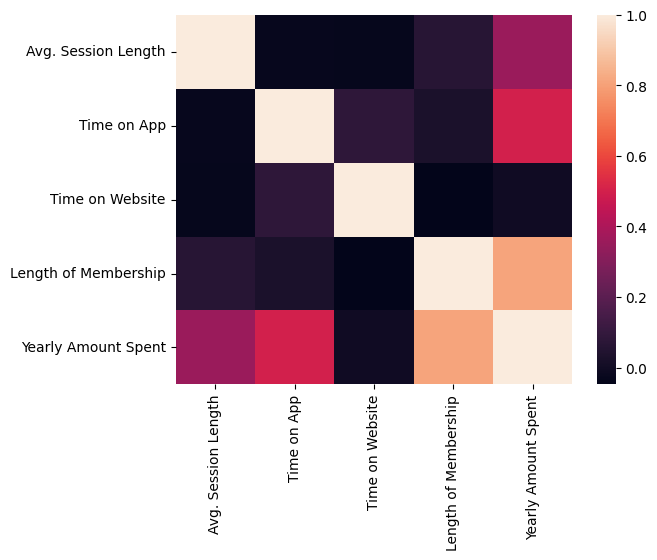

In [22]:
sns.heatmap(df_customers.corr())

Notamos que la variable que mas se correlaciona con el monto anual gastado por el cliente en la tienda es el tiempo de membresia.

##Regresión lineal Simple

Primero utilizamos un modelo de regresión lineal simple utilizando solo una variable, la variable **Length of Membership** para tratar de predecir la variable **Yearly Amount Spent**

Seleccionamos las dos variables y las guardamos en un dataframe **df_customers_RLS**


In [8]:
df_customers_RLS=df_customers[['Length of Membership','Yearly Amount Spent']]


Genere el conjunto de prueba y de entrenamiento. Utilizando un 70% para entrenar y un 30% para probar:

In [ ]:
X=df_customers_RLS[['Length of Membership']]
y=df_customers_RLS['Yearly Amount Spent']

In [10]:
X_train, X_test, y_train,  y_test= train_test_split(X,y,test_size=0.30,random_state=199,shuffle=True)



In [11]:
X_train.count(),X_test.count()

(Length of Membership    350
 dtype: int64,
 Length of Membership    150
 dtype: int64)

Generamos el modelo de regresión lineal utilizando la librería **sklearn** e imprimimos los coeficientes del modelo:

In [12]:
model=LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)









LinearRegression()

In [13]:
print ('Coeficiente: ', model.coef_)
print ('Intercepción: ',model.intercept_)

Coeficiente:  [63.95991317]
Intercepción:  277.0146685622873


Evaluamos el modelo utilizando las métricas MAE, MSE y RMSE

Con el Accuracy podemos observar la exactitud de nuestro modelo al comparar los resultados de la predicción con los valores reales.

In [16]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))


MAE: 40.673692474497315
MSE: 2469.5979518354575
RMSE: 49.69504957071134


In [17]:
print("Accuracy: \n", metrics.r2_score(y_test, predictions))

Accuracy: 
 0.6068838607921658


Observamos en un gráfico de dispersión los valores de la predicción frente a los valores reales:

Text(0.5, 0, 'Y test')

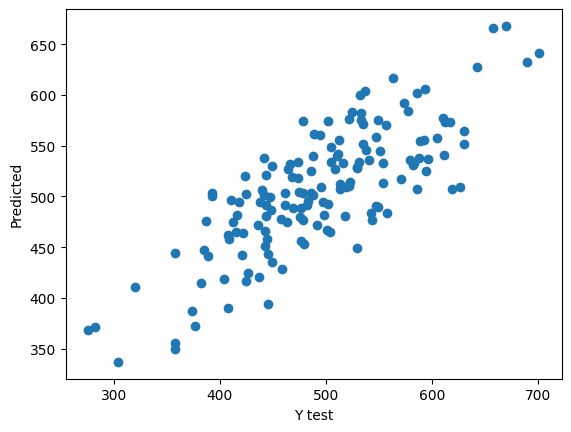

In [18]:
plt.pyplot.scatter(y_test, predictions)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

##Regresión lineal Múltiple

Ahora utilizaremos un modelo de regresión lineal múltiple utilizando las cuatro variables para tratar de predecir la variable **Yearly Amount Spent**

Seleccioneamos las cinco variables del dataset original y las guardamos en un nuevo dataframe **df_customers_RLM**

In [19]:
df_customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [20]:
df_customers_RLM=df_customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]


In [21]:
X1=df_customers_RLM[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y1=df_customers_RLM['Yearly Amount Spent']

Generamos el conjunto de prueba y de entrenamiento. Utilizando un 70% para entrenar y un 30% para probar:

In [22]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.30,random_state=199,shuffle=True)




Generamos el modelo de regresión lineal utilizando la librería **sklearn** e imprimimos los coeficientes del modelo:

In [25]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X1_train,y1_train)

print ('Coeficiente: ', model.coef_)
print ('Intercepción: ',model.intercept_)







Coeficiente:  [25.57482153 38.20081687  0.41240828 61.72342638]
Intercepción:  -1040.1146060107449


In [26]:
predictions1=model1.predict(X1_test)

Evaluamos con las métricas MAE, MSE, RMSE y r2


In [27]:
print('MAE: {}'.format(metrics.mean_absolute_error(y1_test, predictions1)))
print('MSE: {}'.format(metrics.mean_squared_error(y1_test, predictions1)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y1_test, predictions1))))






MAE: 7.822820240496136
MSE: 95.51339234566056
RMSE: 9.773095330838668


In [28]:
print("Accuracy: \n", metrics.r2_score(y1_test, predictions1))

Accuracy: 
 0.9847959640500743


Creamos el gráfico de dispersión de los valores de prueba reales frente a los valores predichos:

Text(0.5, 0, 'Y test')

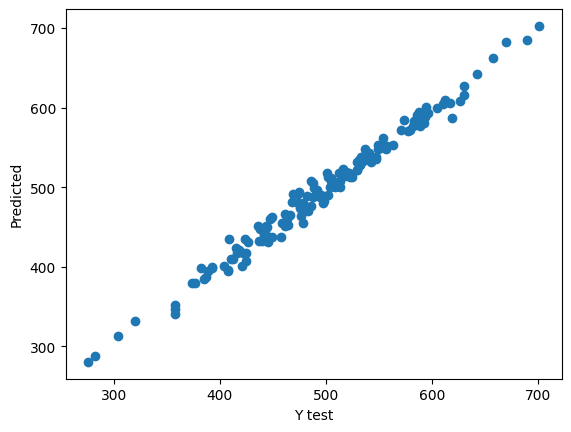

In [29]:
plt.pyplot.scatter(y1_test, predictions1)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')




Nos damos cuenta que al incluir otras variables independientes a nuestro modelo, mejora en gran manera la exactitud del mismo y nos permite hacer una mejor predicción.

## Conclusiones
Todavía queremos encontrar la respuesta a la pregunta original, ¿enfocamos nuestro esfuerzo en el desarrollo de aplicaciones móviles o sitios web?

Interpretaremos los coeficientes obtenidos en nuestro modelo para hacernos una idea.


In [31]:
df_coeficientes = df_customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
pd.DataFrame(model1.coef_, df_coeficientes.columns, columns=['Coeffecient'])



,Coeffecient
Avg. Session Length,25.574822
Time on App,38.200817
Time on Website,0.412408
Length of Membership,61.723426


De la observación de los coeficeientes obtenidos, podemos interpretar que la variable que más influye en la predicción del monto de compra anual en un cliente es el tiempo de su membresía, y la que menos influye, es el tiempo de uso del sitio web, al igual, podemos notar que el tiempo de navegación por la App, a pesar de que es menor su promedio respecto al de navegación en el sitio web, notamos que tiene una mayor influencia sobre el monto de compra anual.

Teniendo en cuenta lo analizado en el punto anterior, recomendaría a la empresa, que invierta mayor esfuerzo en la experiencia de la aplicación movil.